In [1]:
knitr::opts_chunk$set(
  collapse = TRUE,
  warning = FALSE,
  comment = "#>",
  root.dir = './'
)
#knitr::opts_chunk$set(eval = FALSE)

This vignette outlines the steps of inference, analysis and visualization of cell-cell communication network for **a single dataset using CellChat**. We showcase CellChat’s diverse functionalities by applying it to a scRNA-seq data on cells from lesional (LS, diseased) human skin from patients.  

CellChat requires gene expression data of cells as the user input and models the probability of cell-cell communication by integrating gene expression with prior knowledge of the interactions between signaling ligands, receptors and their cofactors. 

Upon infering the intercellular communication network, CellChat provides functionality for further data exploration, analysis, and visualization. 

## Load the required libraries

In [1]:
library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)
# reticulate::use_python("/Users/suoqinjin/anaconda3/bin/python", required=T) 

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [2]:
# Here we load a scRNA-seq data matrix and its associated cell meta data
# This is a combined data from two biological conditions: normal and diseases
sample = 'Slow'
cellchat = readRDS(paste0("/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/cellchat/", sample, ".rds"))
cellchat

An object of class CellChat created from a single dataset 
 27610 genes.
 45796 cells. 
CellChat analysis of spatial data! The input spatial locations are 
      x_cent y_cent
50018  17100   8750
70599  10850  18300
56393  16700  19650
84203  17400  20250
62110   7450  18100
80329  16900  21000

CellChat can also visualize the aggregated cell-cell communication network. For example, showing the number of interactions or the total interaction strength (weights) between any two cell groups using circle plot.

Due to the complicated cell-cell communication network, we can examine the signaling sent from each cell group. Here we also control the parameter `edge.weight.max` so that we can compare edge weights between differet networks. 

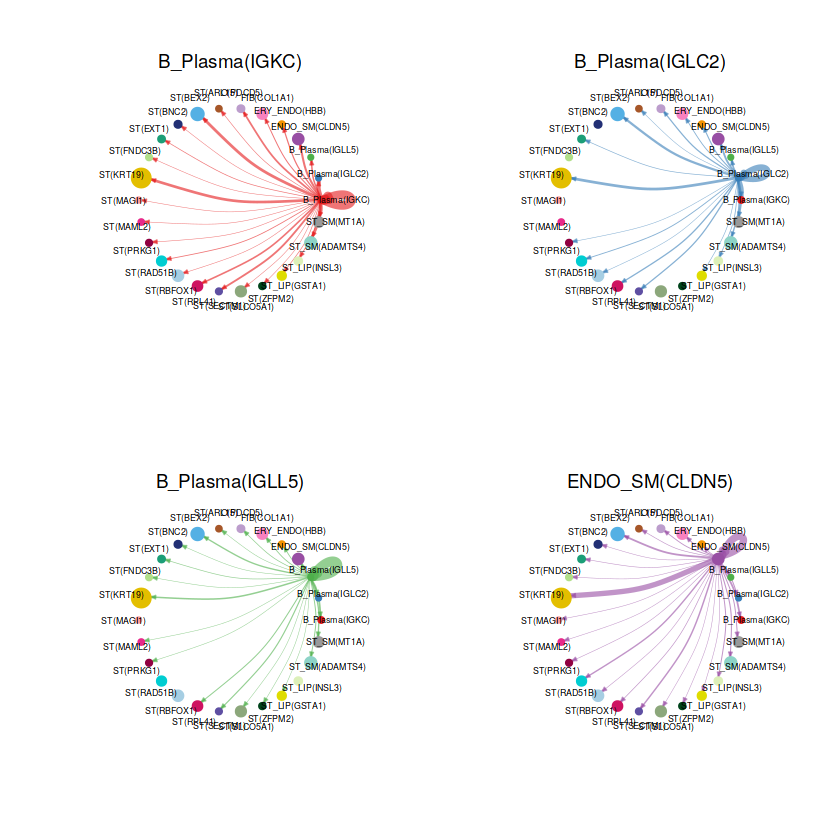

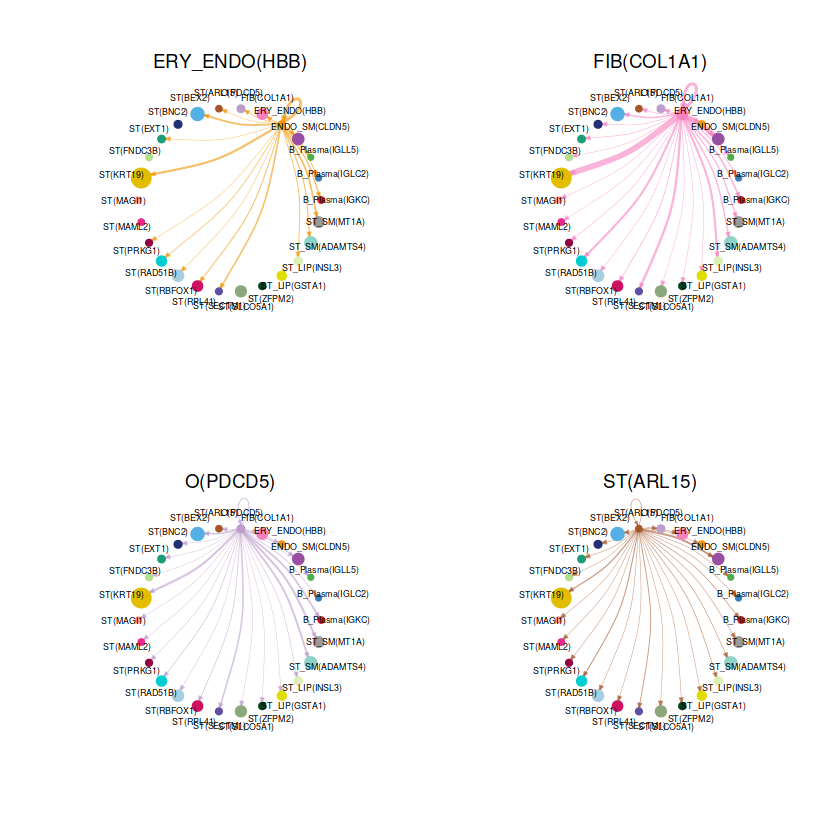

In [66]:
mat <- cellchat@net$weight
par(mfrow = c(2,2), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  netVisual_circle(mat2, vertex.weight = groupSize, vertex.label.cex=0.5, weight.scale = T, edge.weight.max = max(mat), margin=0.1, title.name = rownames(mat)[i])
}

# Part III: Visualization of cell-cell communication network
Upon infering the cell-cell communication network, CellChat provides various functionality for further data exploration, analysis, and visualization. Specifically:

* It provides several ways for visualizing cell-cell communication network, including hierarchical plot, circle plot, Chord diagram, and bubble plot. 

* It provides an easy-to-use tool for extracting and visualizing high-order information of the inferred networks. For example, it allows ready prediction of major signaling inputs and outputs for cell populations and how these populations and signals coordinate together for functions.

* It can quantitatively characterize and compare the inferred cell-cell communication networks using an integrated approach by combining social network analysis, pattern recognition, and manifold learning approaches.

## Visualize each signaling pathway using Hierarchy plot, Circle plot or Chord diagram

**Hierarchy plot**: USER should define `vertex.receiver`, which is a numeric vector giving the index of the cell groups as targets in the left part of hierarchy plot. This hierarchical plot consist of two components: the left portion shows autocrine and paracrine signaling to certain cell groups of interest (i.e, the defined `vertex.receiver`), and the right portion shows autocrine and paracrine signaling to the remaining cell groups in the dataset. Thus, hierarchy plot provides an informative and intuitive way to visualize autocrine and paracrine signaling communications between cell groups of interest. For example, when studying the cell-cell communication between fibroblasts and immune cells, USER can define `vertex.receiver` as all fibroblast cell groups. 

**Chord diagram**: CellChat provides two functions `netVisual_chord_cell` and `netVisual_chord_gene` for visualizing cell-cell communication with different purposes and different levels. `netVisual_chord_cell` is used for visualizing the cell-cell communication between different cell groups (where each sector in the chord diagram is a cell group), and `netVisual_chord_gene` is used for visualizing the cell-cell communication mediated by mutiple ligand-receptors or signaling pathways (where each sector in the chord diagram is a ligand, receptor or signaling pathway.)

**Explnations of edge color/weight, node color/size/shape**: In all visualization plots, edge colors are consistent with the sources as sender, and edge weights are proportional to the interaction strength. Thicker edge line indicates a stronger signal. In the **Hierarchy plot and Circle plot**, circle sizes are proportional to the number of cells in each cell group. In the hierarchy plot, solid and open circles represent source and target, respectively. In the **Chord diagram**, the inner thinner bar colors represent the targets that receive signal from the corresponding outer bar. The inner bar size is proportional to the signal strength received by the targets. Such inner bar is helpful for interpreting the complex chord diagram. Note that there exist some inner bars without any chord for some cell groups, please just igore it because this is an issue that has not been addressed by [circlize](https://github.com/jokergoo/circlize) package. 

**Visualization of cell-cell communication at different levels**: One can visualize the inferred communication network of signaling pathways using `netVisual_aggregate`, and visualize the inferred communication networks of individual L-R pairs associated with that signaling pathway using `netVisual_individual`.

Here we take input of one signaling pathway as an example. All the signaling pathways showing significant communications can be accessed by `cellchat@netP$pathways`.

In [22]:
levels(cellchat@idents)[seq(4,6)]

[1] "ENDO_SM(CLDN5)" "ERY_ENDO(HBB)"  "FIB(COL1A1)"

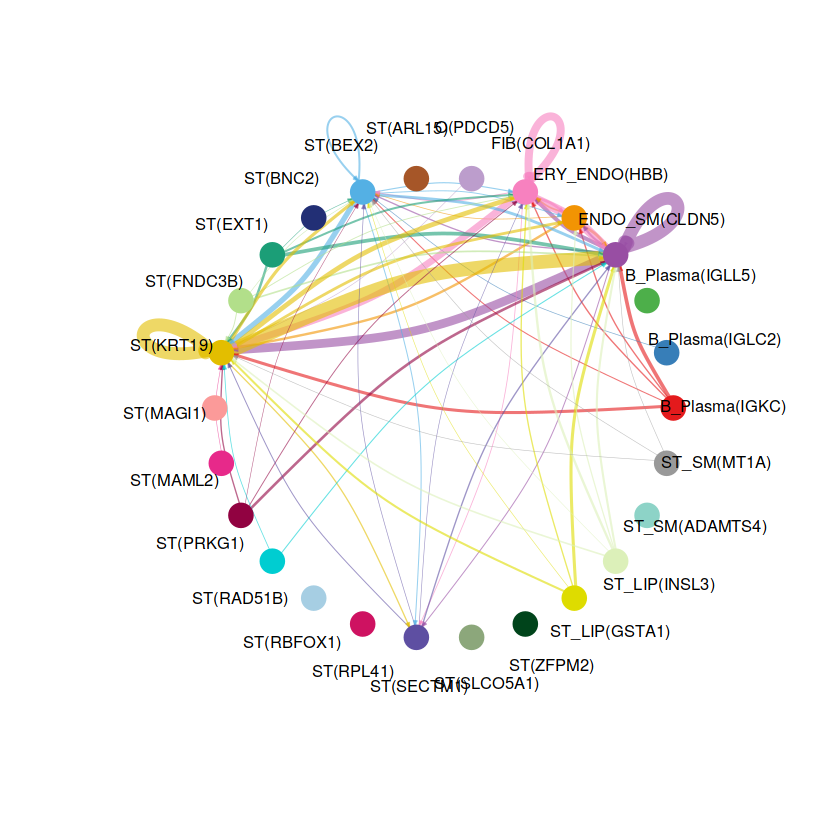

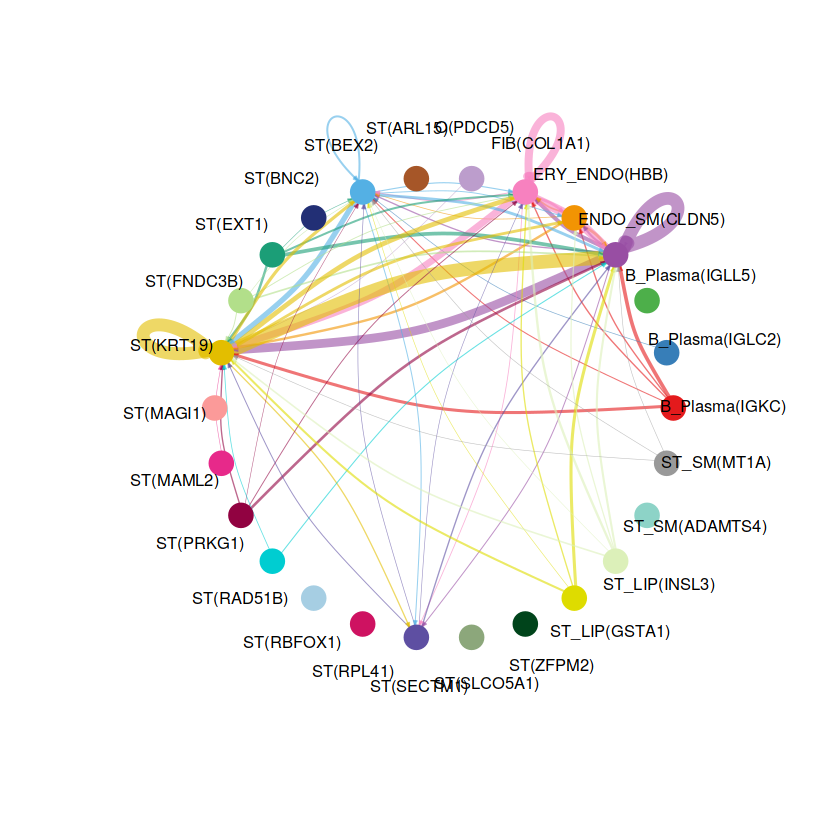

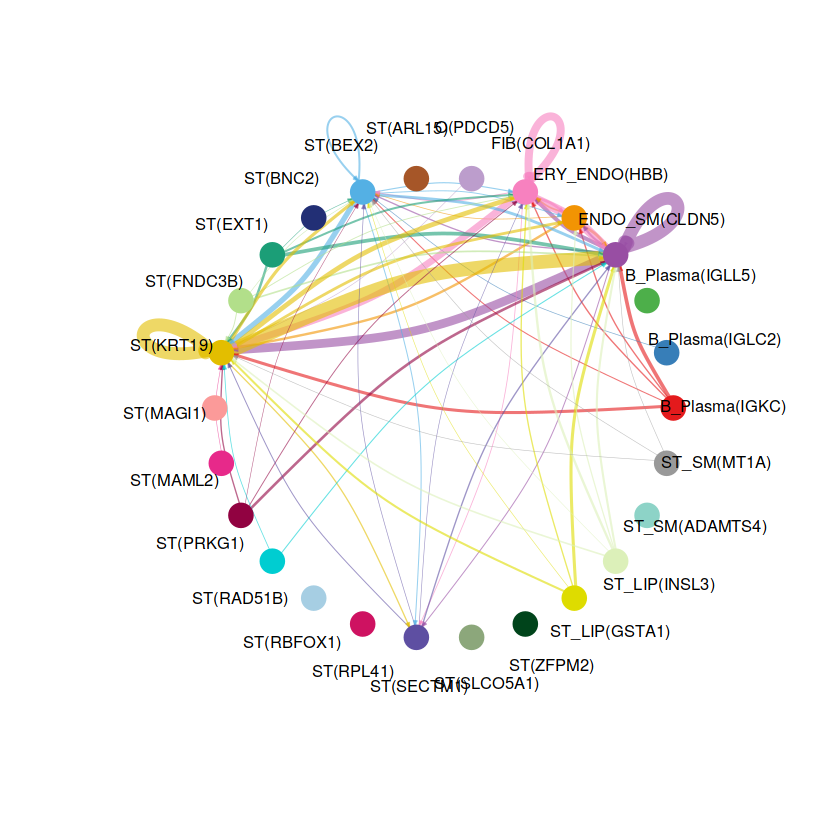

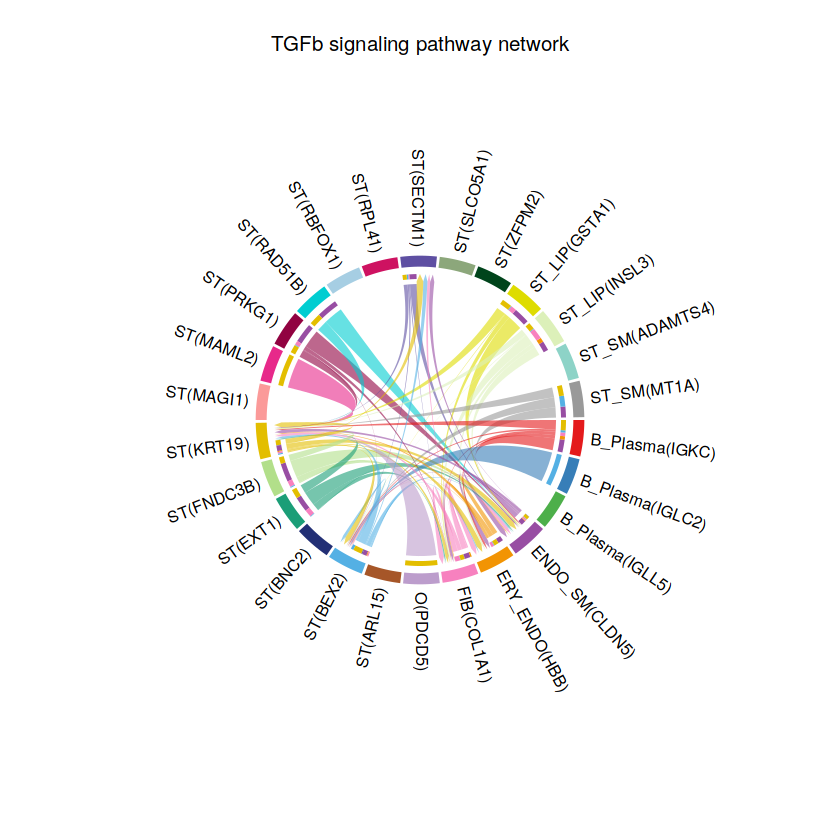

Do heatmap based on a single object 




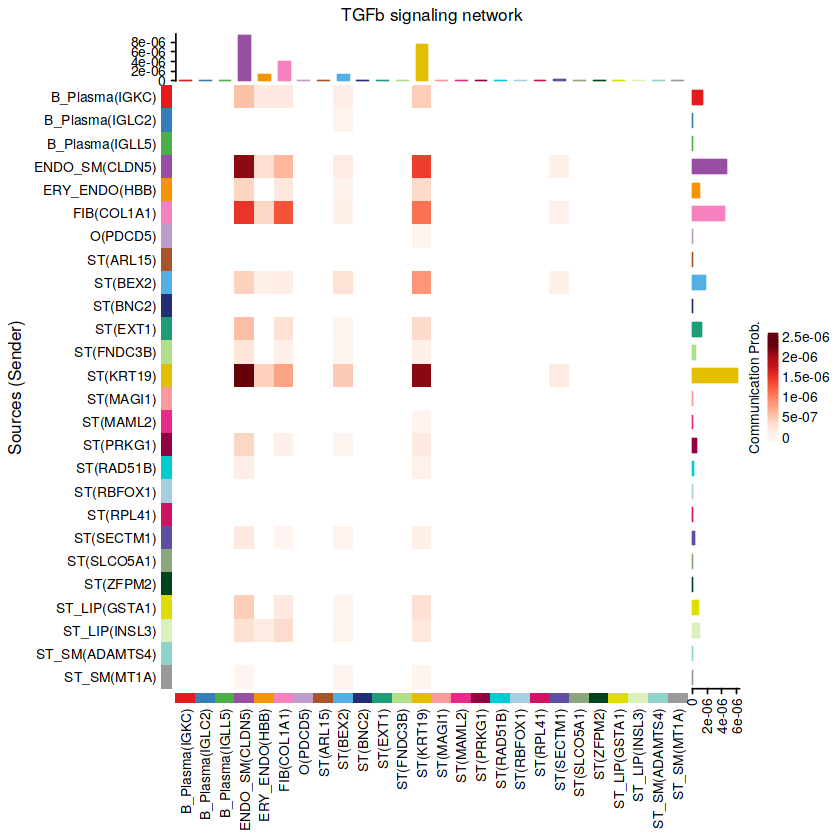

In [3]:
pathways.show <- c("TGFb") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(4,6) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
# Chord diagram
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord")
# Heatmap
par(mfrow=c(1,1))
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")

For the chord diagram, CellChat has an independent function `netVisual_chord_cell` to flexibly visualize the signaling network by adjusting different parameters in the [circlize](https://github.com/jokergoo/circlize) package. For example, we can define a named char vector `group` to create multiple-group chord diagram, e.g., grouping cell clusters into different cell types. 

Plot the aggregated cell-cell communication network at the signaling pathway level



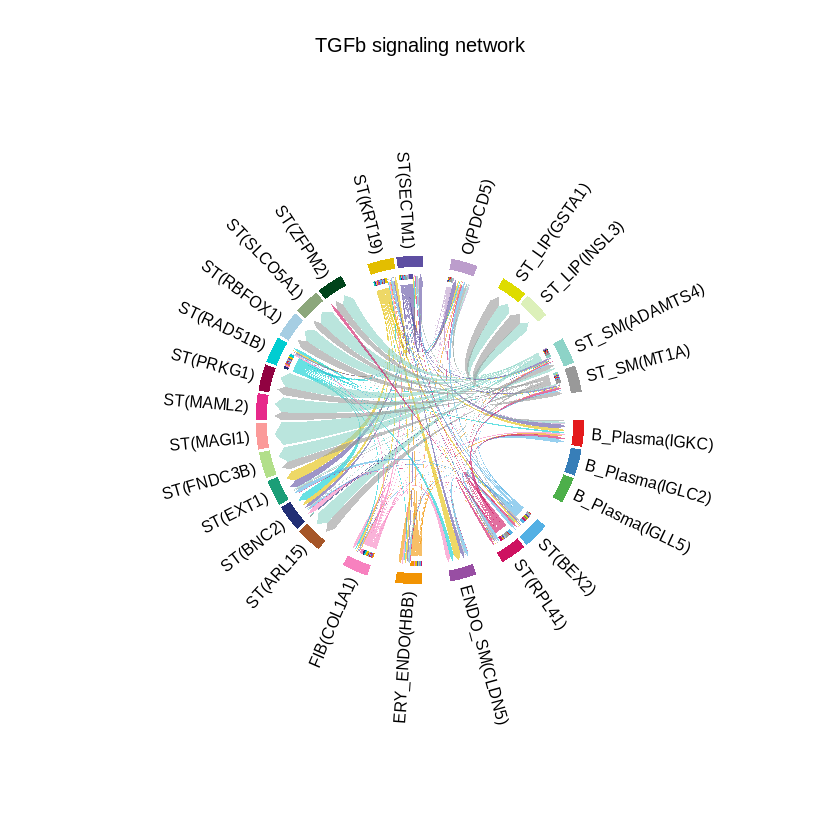

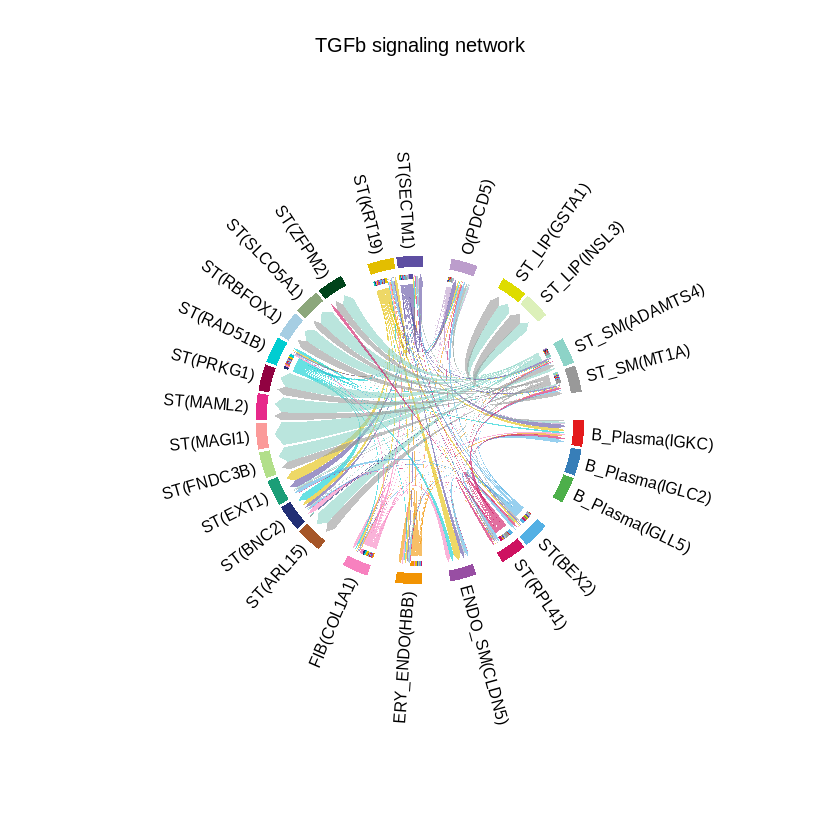

In [28]:
# Chord diagram
group.cellType <- c(rep("B_Plasma", 3), rep("ENDO_SM", 1), rep("ERY_ENDO", 1), rep("FIB", 1), rep("O", 1), rep('Med_ST', 1), rep('Cortex_ST', 1), rep('Med_ST', 3), rep('Midcor_ST', 1), rep('Med_ST', 5), rep('Cortex_ST', 1),rep('Midcor_ST', 1), rep('Med_ST', 2), rep('ST_LIP', 2), rep('ST_SM', 2)) # grouping cell clusters into fibroblast, DC and TC cells
names(group.cellType) <- levels(cellchat@idents)
netVisual_chord_cell(cellchat, signaling = pathways.show, group = group.cellType, title.name = paste0(pathways.show, " signaling network"))

### Compute the contribution of each ligand-receptor pair to the overall signaling pathway and visualize cell-cell communication mediated by a single ligand-receptor pair

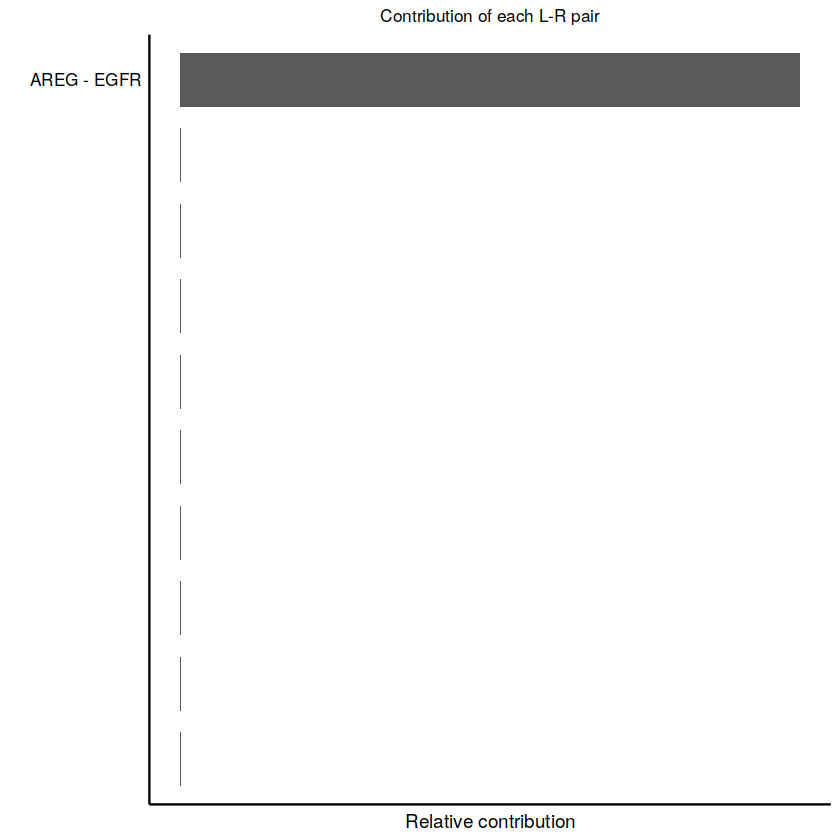

In [5]:
# netAnalysis_contribution(cellchat, signaling = pathways.show)
netAnalysis_contribution(cellchat, signaling = 'EGF')

We can also visualize the cell-cell communication mediated by a single ligand-receptor pair. We provide a function `extractEnrichedLR` to extract all the significant interactions (L-R pairs) and related signaling genes for a given signaling pathway.  

[[1]]


[[1]]


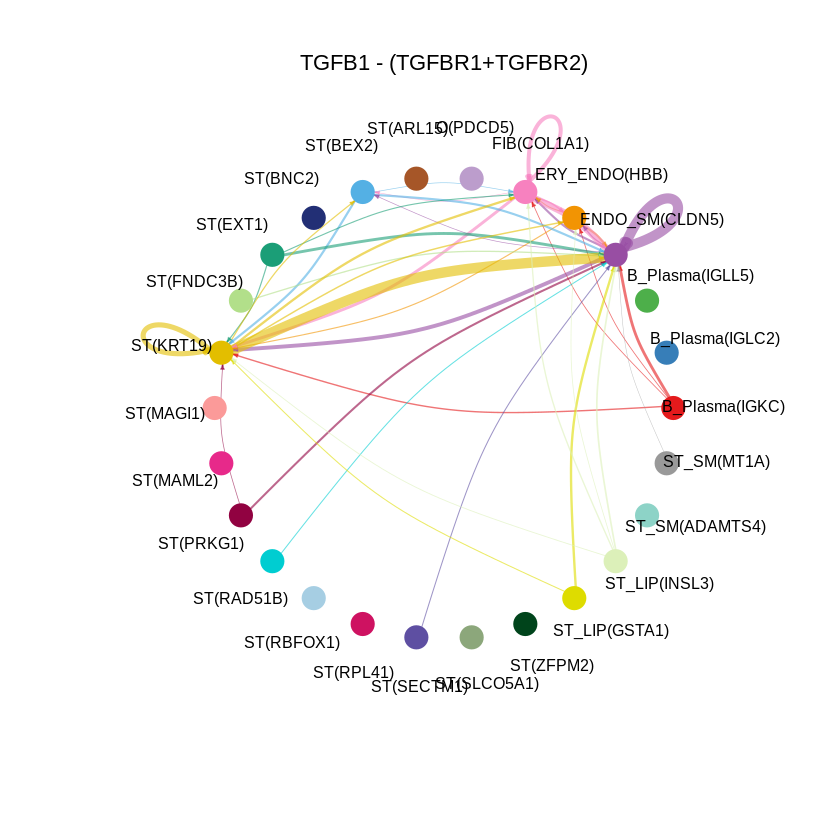

[[1]]


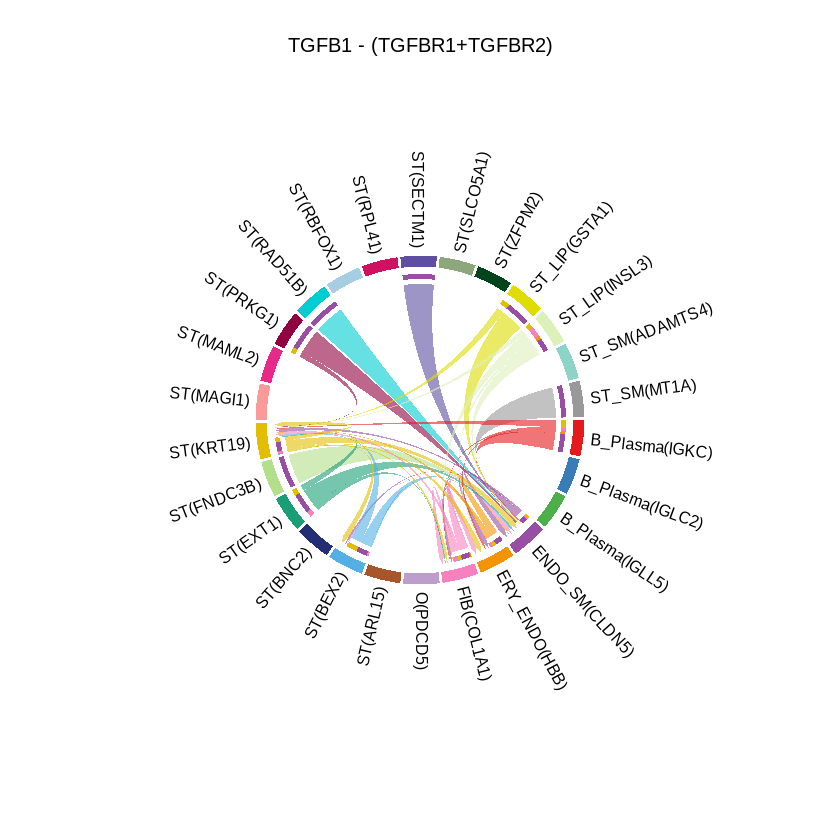

In [30]:
pairLR.EGF <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.EGF[1,] # show one ligand-receptor pair
# Hierarchy plot
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
# Circle plot
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")
# Chord diagram
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")

### Automatically save the plots of the all inferred network for quick exploration
In practical use, USERS can use 'for ... loop' to automatically save the all inferred network for quick exploration using `netVisual`. `netVisual` supports an output in the formats of svg, png and pdf. 

In [36]:
install.packages('Cairo') 

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [37]:
figdir = paste0('/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/cellchat/figure_sp/', sample, '/')
if (!dir.exists(figdir)) {
  dir.create(figdir)
}
# Access all the signaling pathways showing significant communications
pathways.show.all <- cellchat@netP$pathways
# check the order of cell identity to set suitable vertex.receiver
levels(cellchat@idents)
vertex.receiver = seq(4,6) # a numeric vector.
for (i in 1:length(pathways.show.all)) {
  # Visualize communication network associated with both signaling pathway and individual L-R pairs
  netVisual(cellchat, signaling = pathways.show.all[i], vertex.receiver = vertex.receiver, layout = "hierarchy")
  # Compute and visualize the contribution of each ligand-receptor pair to the overall signaling pathway
  gg <- netAnalysis_contribution(cellchat, signaling = pathways.show.all[i])
  ggsave(filename=paste0(figdir, pathways.show.all[i], "_L-R_contribution.svg"), plot=gg, width = 3, height = 2, units = 'in', dpi = 300)
}

[1] "B_Plasma(IGKC)"  "B_Plasma(IGLC2)" "B_Plasma(IGLL5)" "ENDO_SM(CLDN5)" 
 [5] "ERY_ENDO(HBB)"   "FIB(COL1A1)"     "O(PDCD5)"        "ST(ARL15)"      
 [9] "ST(BEX2)"        "ST(BNC2)"        "ST(EXT1)"        "ST(FNDC3B)"     
[13] "ST(KRT19)"       "ST(MAGI1)"       "ST(MAML2)"       "ST(PRKG1)"      
[17] "ST(RAD51B)"      "ST(RBFOX1)"      "ST(RPL41)"       "ST(SECTM1)"     
[21] "ST(SLCO5A1)"     "ST(ZFPM2)"       "ST_LIP(GSTA1)"   "ST_LIP(INSL3)"  
[25] "ST_SM(ADAMTS4)"  "ST_SM(MT1A)"

ERROR: Error in grDevices::png(paste0(signaling.name, "_hierarchy_individual.png"), : unable to start device 'png'


## Visualize cell-cell communication mediated by multiple ligand-receptors or signaling pathways
CellChat can also show all the significant interactions mediated by L-R pairs and signaling pathways, and interactions provided by users from some cell groups to other cell groups using the function netVisual_bubble (option A) and netVisual_chord_gene (option B).

### (A)  Bubble plot
We can also show all the significant interactions (L-R pairs) from some cell groups to other cell groups using `netVisual_bubble`.

Comparing communications on a single object 


Comparing communications on a single object 




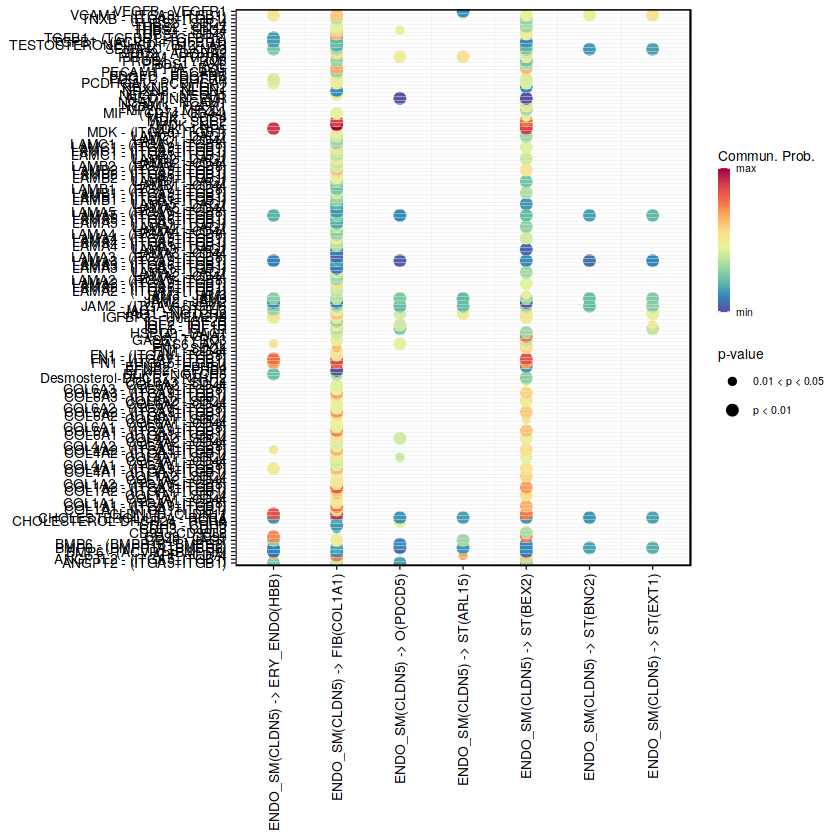

Comparing communications on a single object 




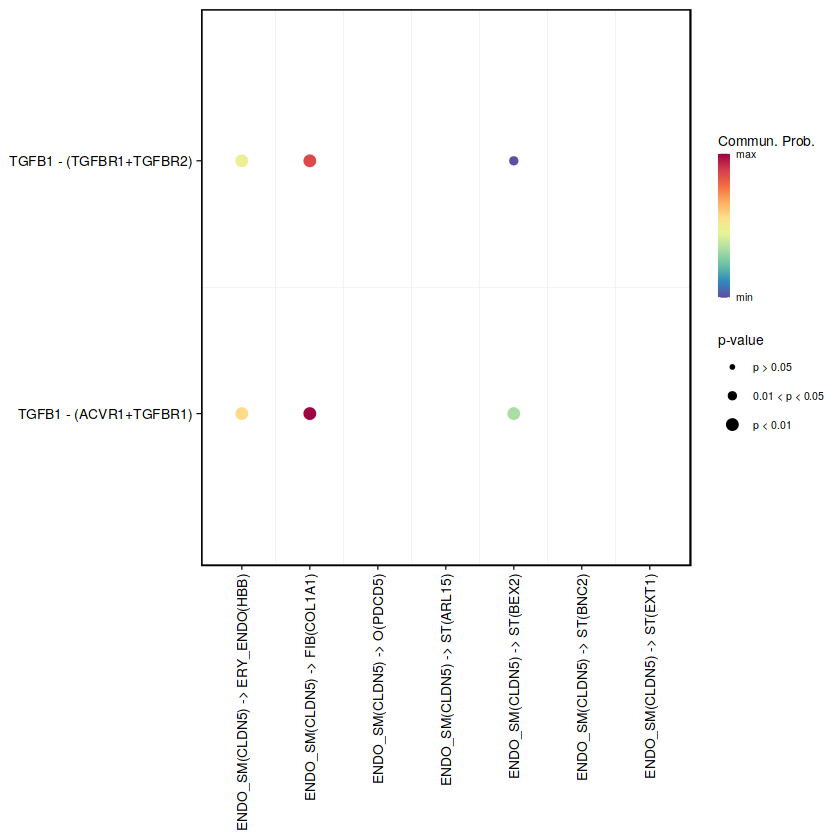

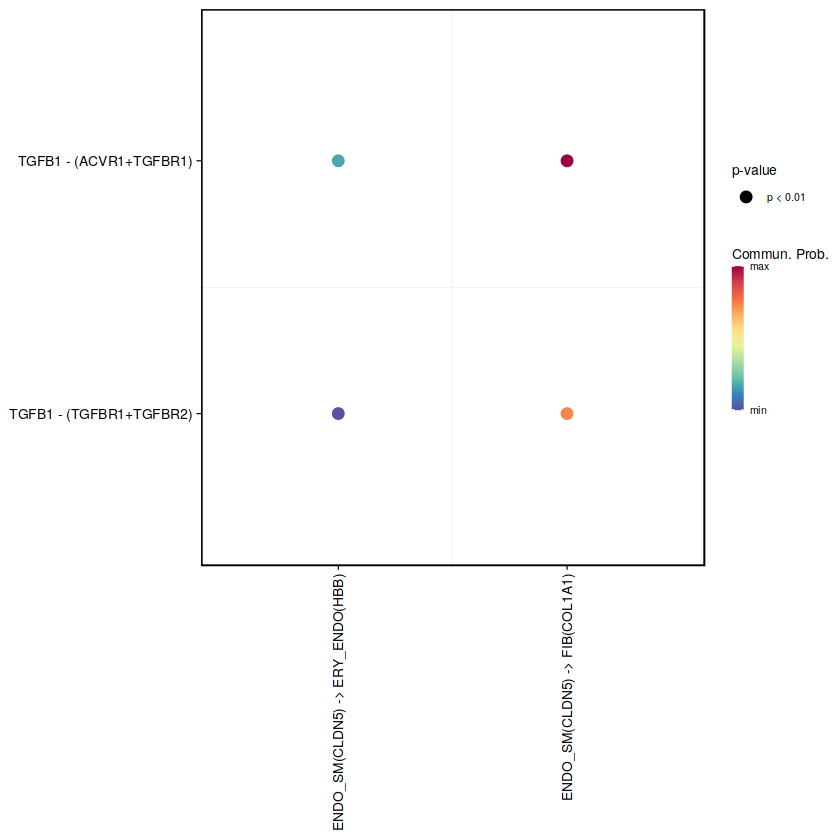

In [39]:
# (1) show all the significant interactions (L-R pairs) from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
netVisual_bubble(cellchat, sources.use = 4, targets.use = c(5:11), remove.isolate = FALSE)
# (2) show all the significant interactions (L-R pairs) associated with certain signaling pathways
netVisual_bubble(cellchat, sources.use = 4, targets.use = c(5:11), signaling = c("TGFb","EGF"), remove.isolate = FALSE)
# (3) show all the significant interactions (L-R pairs) based on user's input (defined by `pairLR.use`)
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("TGFb","EGF","FGF"))
netVisual_bubble(cellchat, sources.use = c(3,4), targets.use = c(5:8), pairLR.use = pairLR.use, remove.isolate = TRUE)

# Part IV: Systems analysis of cell-cell communication network
To facilitate the interpretation of the complex intercellular communication networks, CellChat quantitively measures networks through methods abstracted from graph theory, pattern recognition and manifold learning. 

* It can determine major signaling sources and targets as well as mediators and influencers within a given signaling network using centrality measures from network analysis

* It can predict key incoming and outgoing signals for specific cell types as well as coordinated responses among different cell types by leveraging pattern recognition approaches. 

* It can group signaling pathways by defining similarity measures and performing manifold learning from both functional and topological perspectives.

* It can delineate conserved and context-specific signaling pathways by joint manifold learning of multiple networks.

## Identify signaling roles (e.g., dominant senders, receivers) of cell groups as well as the major contributing signaling
CellChat allows ready identification of **dominant senders, receivers, mediators and influencers** in the intercellular communication network by computing several network centrality measures for each cell group. Specifically, we used measures in weighted-directed networks, including **out-degree, in-degree, flow betweenesss and information centrality**, to respectively identify dominant senders, receivers, mediators and influencers for the intercellular communications. In a weighteddirected network with the weights as the computed communication probabilities, the outdegree, computed as the sum of communication probabilities of the outgoing signaling from a cell group, and the in-degree, computed as the sum of the communication probabilities of the incoming signaling to a cell group, can be used to identify the dominant cell senders and receivers of signaling networks, respectively. For the definition of flow betweenness and information centrality, please check our published paper and related [reference](https://link.springer.com/article/10.1007/s12599-010-0127-3). 

Users can visualize the centrality scores on a heatmap (option A) and a 2D plot (option B). CellChat can also answer the question on which signals contribute the most to outgoing or incoming signaling of certain cell groups (option C).

### (A)	Compute and visualize the network centrality scores

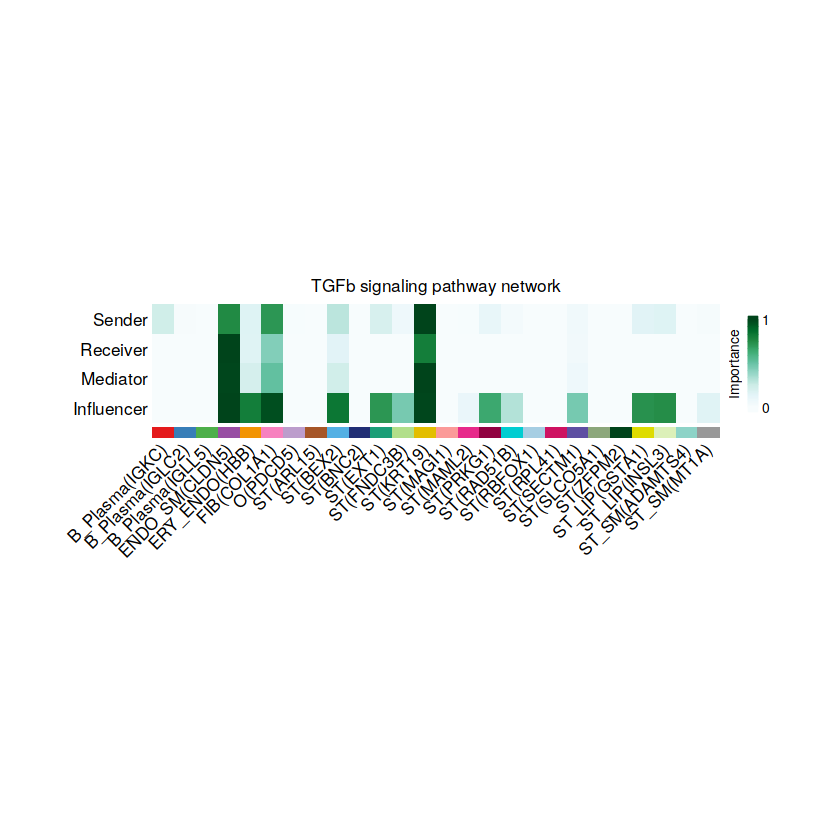

In [46]:
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 12, height = 2.5, font.size = 10)

### (B) Visualize dominant senders (sources) and receivers (targets) in a 2D space
CellChat also provides another intuitive way to visualize the dominant senders (sources) and receivers (targets) in a 2D space using scatter plot. x-axis and y-axis are respectively the total outgoing or incoming communication probability associated with each cell group. Dot size is proportional to the number of inferred links (both outgoing and incoming) associated with each cell group. Dot colors indicate different cell groups. Dot shapes indicate different categories of cell groups if `group` is defined. 

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the cell-cell communication network from user's input



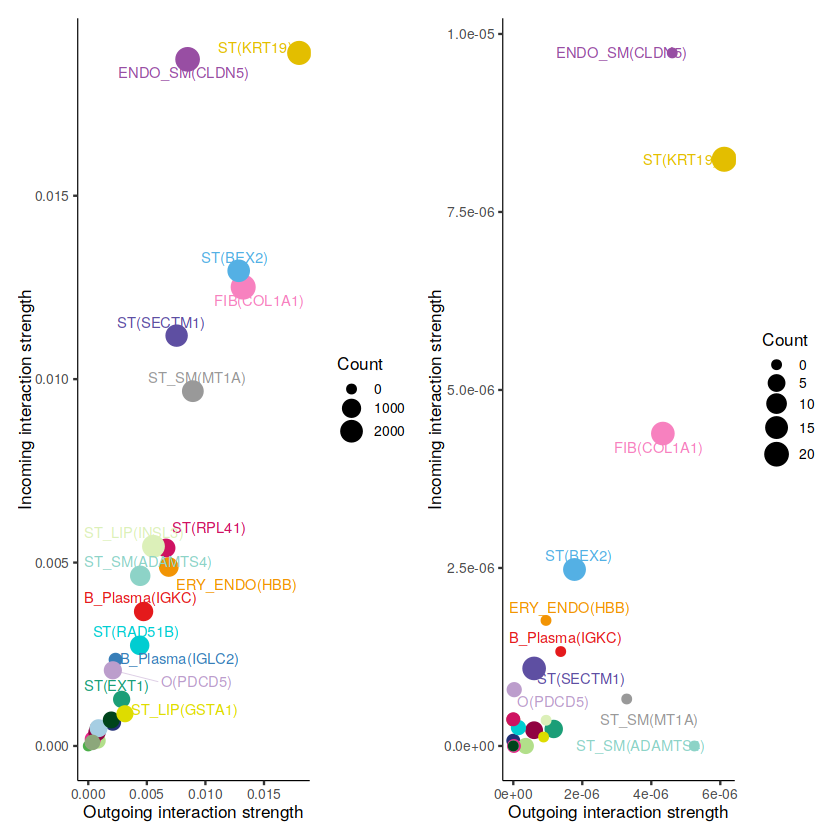

In [47]:
# Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
gg1 <- netAnalysis_signalingRole_scatter(cellchat)
# Signaling role analysis on the cell-cell communication networks of interest
gg2 <- netAnalysis_signalingRole_scatter(cellchat, signaling = c("EGF", "TGFb"))
gg1 + gg2

### (C) Identify signals contributing the most to outgoing or incoming signaling of certain cell groups	
We can also answer the question on which signals contributing most to outgoing or incoming signaling of certain cell groups. In this heatmap, colobar represents the relative signaling strength of a signaling pathway across cell groups (NB: values are row-scaled). The top colored bar plot shows the total signaling strength of a cell group by summarizing all signaling pathways displayed in the heatmap. The right grey bar plot shows the total signaling strength of a signaling pathway by summarizing all cell groups displayed in the heatmap. 

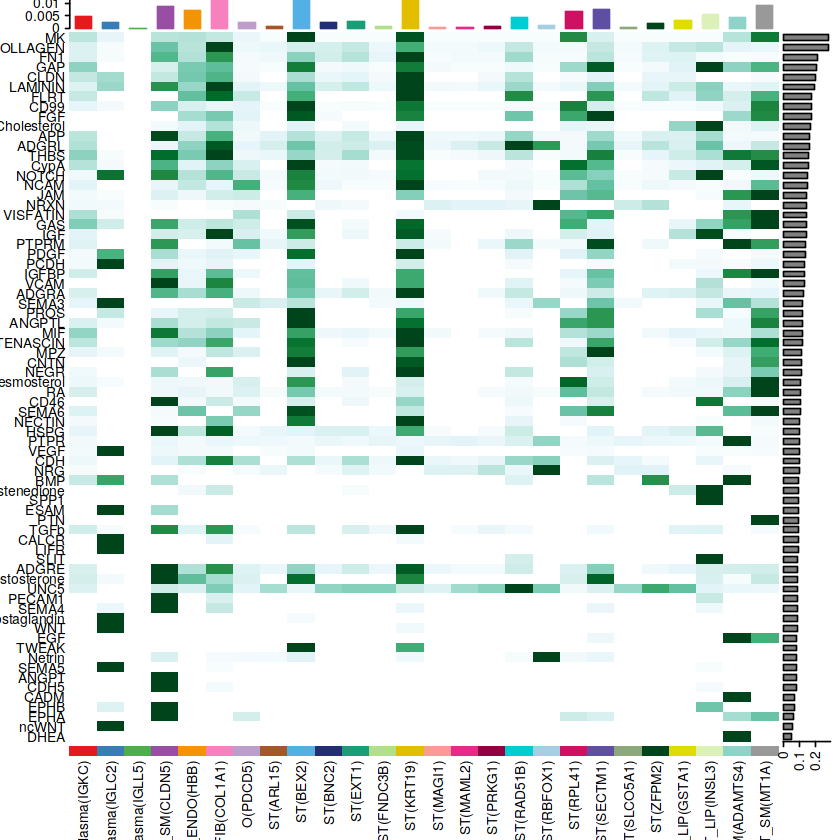

In [53]:
# Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
ht1 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing",height = 15,width = 15)
ht1

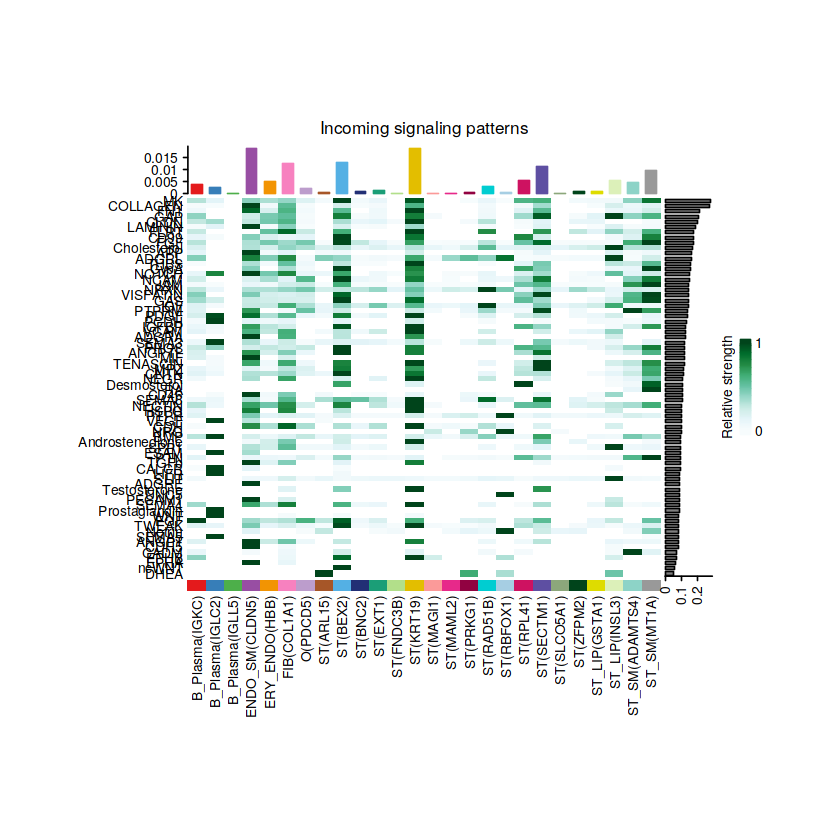

In [51]:
ht2 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming")
ht2

## Identify global communication patterns to explore how multiple cell types and signaling pathways coordinate together
In addition to exploring detailed communications for individual pathways, an important question is how multiple cell groups and signaling pathways coordinate to function. CellChat employs a pattern recognition method to identify the global communication patterns. 

As the number of patterns increases, there might be redundant patterns, making it difficult to interpret the communication patterns. We chose five patterns as default. Generally, it is biologically meaningful with the number of patterns greater than 2. In addition, we also provide a function `selectK` to infer the number of patterns, which is based on two metrics that have been implemented in the NMF R package, including Cophenetic and Silhouette. Both metrics measure the stability for a particular number of patterns based on a hierarchical clustering of the consensus matrix. For a range of the number of patterns, a suitable number of patterns is the one at which Cophenetic and Silhouette values begin to drop suddenly. 

This analysis can be done for outgoing (option A) and incoming (option B) signaling patterns. Outgoing patterns reveal how the sender cells (i.e., cells as signal source) coordinate with each other as well as how they coordinate with certain signaling pathways to drive communication. Incoming patterns show how the target cells (i.e., cells as signal receivers) coordinate with each other as well as how they coordinate with certain signaling pathways to respond to incoming signals.

### (A) Identify and visualize outgoing communication pattern of secreting cells
**Outgoing patterns** reveal how the sender cells (i.e. cells as signal source) coordinate with each other as well as how they coordinate with certain signaling pathways to drive communication. 

For outgoing (or incoming) patterns, the cell group pattern matrix W outputted from the matrix factorization of outgoing (or incoming) cell-cell communication probability indicates how these cell groups coordinate to send (or receive) signals and the signaling pathway pattern matrix H indicates how these signaling pathways work together to send (or receive) signals. To intuitively show the associations of latent patterns with cell groups and ligand-receptor pairs or signaling pathways, we used a **river (alluvial) plot**. We first normalized each row of W and each column of H to be [0,1], and then set the elements in W and H to be zero if they are less than a threshold (by default: 0.5). Such thresholding allows to uncover the most enriched cell groups and signaling pathways associated with each inferred pattern. These thresholded matrices W and H are used as inputs for creating an alluvial plot. 

Moreover, to directly relate cell groups with their enriched signaling pathways, we set the elements in W and H to be zero if they are less than a threshold (by default: 1/R) where R is the number of latent patterns. By using a less strict threshold, more enriched signaling pathways associated each cell group might be obtained. Using a contribution score of each cell group to each signaling pathway computed by multiplying W by H, we constructed a **dot plot** in which the dot size is proportion to the contribution score to show association between cell group and their enriched signaling pathways. Users can also decrease the parameter `cutoff` to show more enriched signaling pathways associated each cell group.

Load required package for the communication pattern analysis

In [54]:
library(NMF)
library(ggalluvial)

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')


Attaching package: ‘NMF’


The following objects are masked from ‘package:igraph’:

    algorithm, compare




Here we run `selectK` to infer the number of patterns.

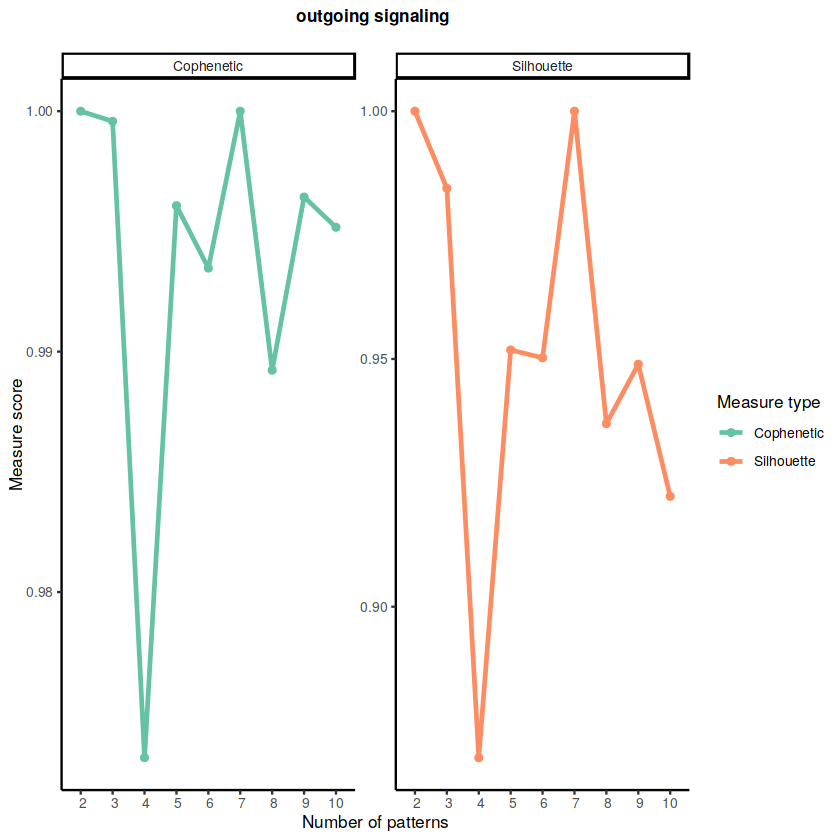

In [55]:
selectK(cellchat, pattern = "outgoing")

Both Cophenetic and Silhouette values begin to drop suddenly when the number of outgoing patterns is 6. 

Please make sure you have load `library(ggalluvial)` when running this function



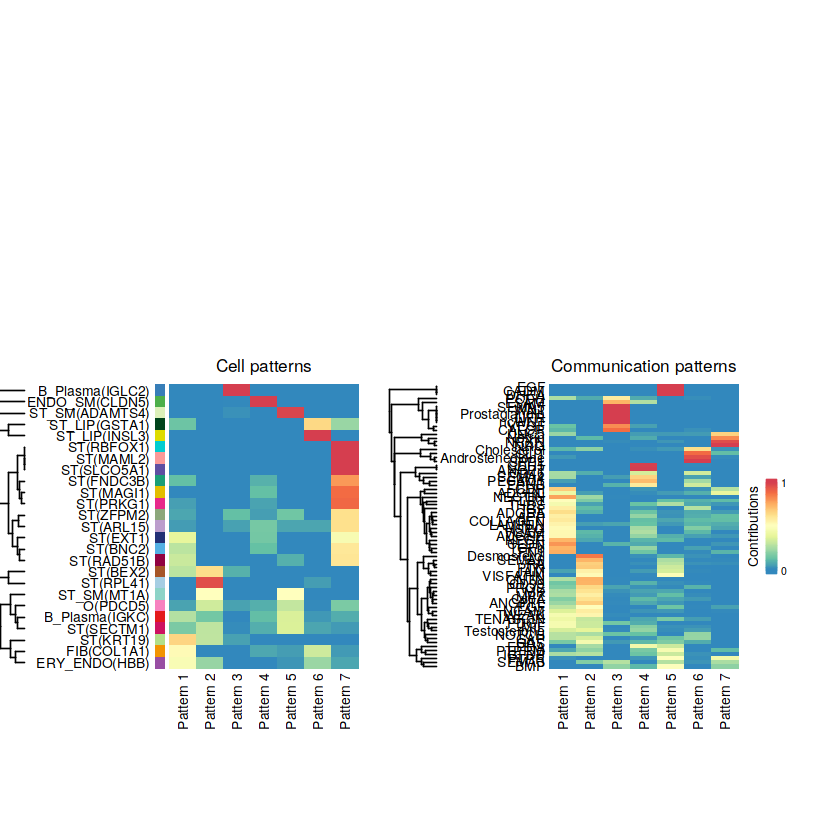

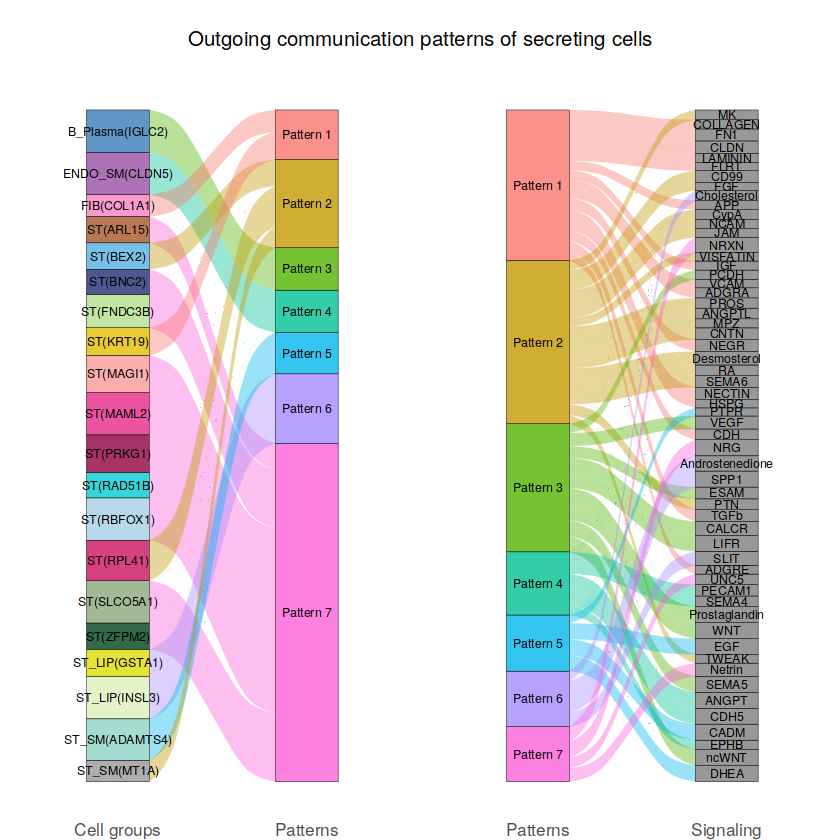

In [62]:
nPatterns = 7
cellchat <- identifyCommunicationPatterns(cellchat, pattern = "outgoing", k = nPatterns)
# river plot
netAnalysis_river(cellchat, pattern = "outgoing")
# dot plot
netAnalysis_dot(cellchat, pattern = "outgoing")

### (B) Identify and visualize incoming communication pattern of target cells
**Incoming patterns** show how the target cells (i.e. cells as signal receivers) coordinate with each other as well as how they coordinate with certain signaling pathways to respond to incoming signals. 

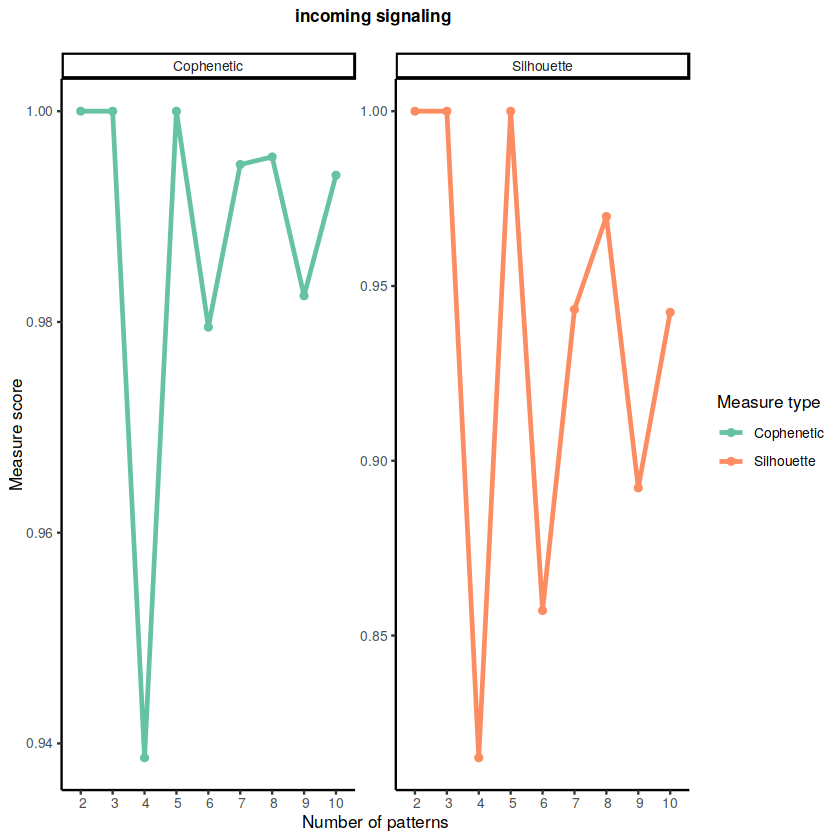

In [57]:
selectK(cellchat, pattern = "incoming")

Cophenetic values begin to drop when the number of incoming patterns is 3. 

Please make sure you have load `library(ggalluvial)` when running this function



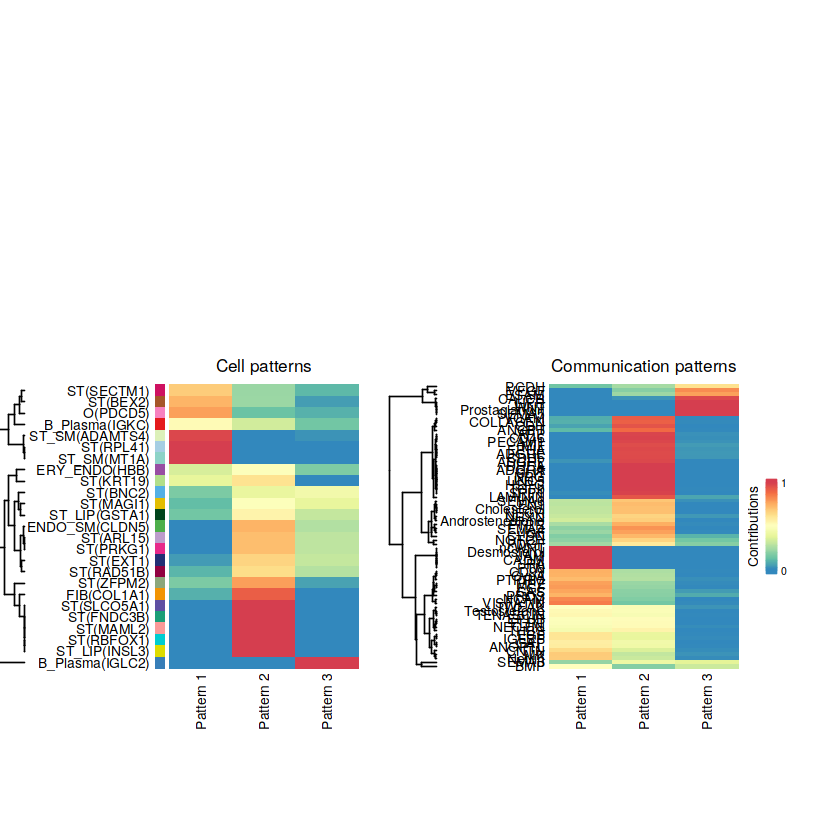

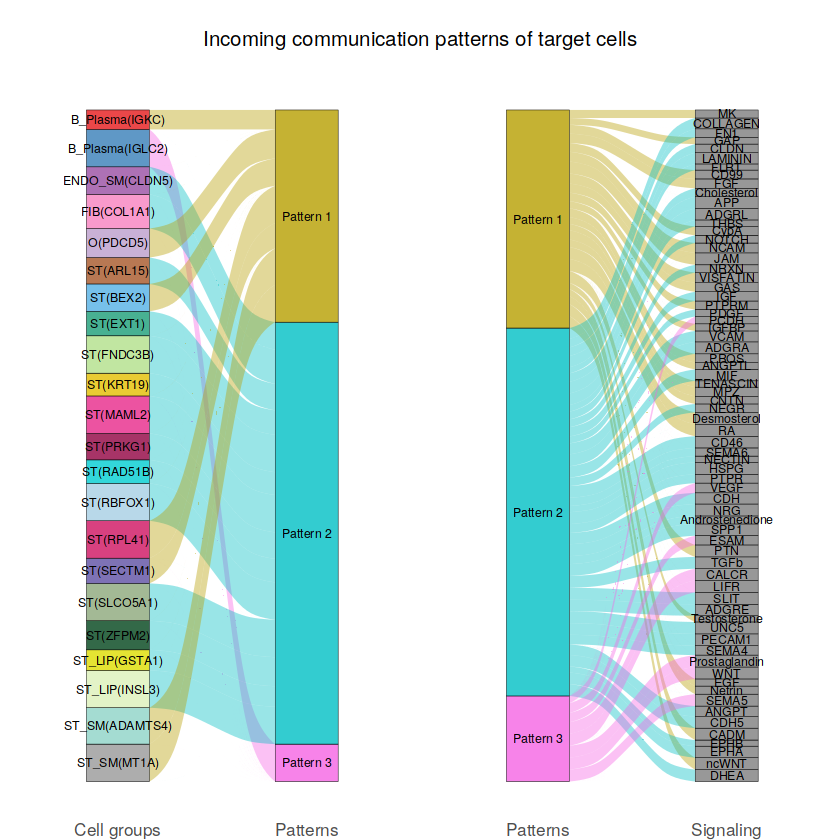

In [58]:
nPatterns = 3
cellchat <- identifyCommunicationPatterns(cellchat, pattern = "incoming", k = nPatterns)
# river plot
netAnalysis_river(cellchat, pattern = "incoming")
# dot plot
netAnalysis_dot(cellchat, pattern = "incoming")

## Manifold and classification learning analysis of signaling networks
Further, CellChat is able to quantify the similarity between all significant signaling pathways and then group them based on their cellular communication network similarity. Grouping can be done either based on the functional or structural similarity. 

**Functional similarity**: High degree of functional similarity indicates major senders and receivers are similar, and it can be interpreted as the two signaling pathways or two ligand-receptor pairs exhibit similar and/or redundant roles. **The functional similarity analysis requires the same cell population composition between two datasets.**

**Structural similarity**: A structural similarity was used to compare their signaling network structure, without considering the similarity of senders and receivers.

### Identify signaling groups based on their functional similarity

In [64]:
reticulate::py_install(packages = 'umap-learn')
cellchat <- computeNetSimilarity(cellchat, type = "functional")
cellchat <- netEmbedding(cellchat, type = "functional")
cellchat <- netClustering(cellchat, type = "functional")
# Visualization in 2D-space
netVisual_embedding(cellchat, type = "functional", label.size = 3.5)
# netVisual_embeddingZoomIn(cellchat, type = "functional", nCol = 2)

Error in python_config_impl(python) : 
  Error 1 occurred running /cm/shared/apps/anaconda3-2021-05/envs/r-reticulate/envs/r-reticulate/bin/python: 
Error in python_config_impl(python) : 
  Error 1 occurred running /cm/shared/apps/anaconda3-2021-05/envs/r-reticulate/bin/python3: 
Error in python_config_impl(python) : 
  Error 1 occurred running /cm/shared/apps/anaconda3-2021-05/envs/r-reticulate/bin/python: 
Error in python_config_impl(python) : 
  Error 1 occurred running /cm/shared/apps/anaconda3-2021-05/envs/r-reticulate/bin/python3: 


+ /cm/shared/apps/anaconda3-2021-05/envs/r-reticulate/bin/conda 'install' '--yes' '--name' 'r-reticulate' '-c' 'conda-forge' 'umap-learn'



ERROR: Error: one or more Python packages failed to install [error code 1]


### Identify signaling groups based on structure similarity

In [ ]:
cellchat <- computeNetSimilarity(cellchat, type = "structural")
cellchat <- netEmbedding(cellchat, type = "structural")
cellchat <- netClustering(cellchat, type = "structural")
# Visualization in 2D-space
netVisual_embedding(cellchat, type = "structural", label.size = 3.5)
netVisual_embeddingZoomIn(cellchat, type = "structural", nCol = 2)
execution.time = Sys.time() - ptm
print(as.numeric(execution.time, units = "secs"))

# Part V: Save the CellChat object

In [ ]:
saveRDS(cellchat, file = "cellchat_humanSkin_LS.rds")